In [ ]:
## Start from this Cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 52.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 57.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=0d596ab59f279340104e2e47a8093d43a79229e2dc03c165a38d387c957a2baf
  Stored in directory: /root/.cache/pip/wheels/00/2d/0f/1fcda4d8c9a77b360dc1df7b43458ef5c95fcb85f556a8d211
  Created wheel for keras_bert: filename=k

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import ktrain
from ktrain import text
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/nlp bio informatics/final_rediology_data.csv')

In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,fulltext,label
0,The cardiomediastinal silhouette appears irreg...,abnormal
1,Stable cardiomegaly. Improved aeration in the ...,abnormal
2,2 views of the chest demonstrate sternotomy a...,abnormal
3,"The heart, pulmonary and mediastinum are with...",abnormal
4,Stable appearance of aortic valve prosthesis. ...,abnormal
...,...,...
3949,The cardiac and mediastinal silhouettes are no...,abnormal
3950,Clear lungs bilaterally. Normal cardiac contou...,normal
3951,Heart size normal. Lungs clear. Stable 5 mm ca...,abnormal
3952,The cardiac and mediastinal silhouettes are un...,abnormal


In [ ]:
!pip install transformers

In [ ]:
data

,fulltext,label
0,The cardiomediastinal silhouette appears irreg...,abnormal
1,Stable cardiomegaly. Improved aeration in the ...,abnormal
2,2 views of the chest demonstrate sternotomy a...,abnormal
3,"The heart, pulmonary and mediastinum are with...",abnormal
4,Stable appearance of aortic valve prosthesis. ...,abnormal
...,...,...
3949,The cardiac and mediastinal silhouettes are no...,abnormal
3950,Clear lungs bilaterally. Normal cardiac contou...,normal
3951,Heart size normal. Lungs clear. Stable 5 mm ca...,abnormal
3952,The cardiac and mediastinal silhouettes are un...,abnormal


In [ ]:
data['label'] = data['label'].replace({'normal': 1, 'abnormal': 0})


In [ ]:
data

,fulltext,label
0,The cardiomediastinal silhouette appears irreg...,0
1,Stable cardiomegaly. Improved aeration in the ...,0
2,2 views of the chest demonstrate sternotomy a...,0
3,"The heart, pulmonary and mediastinum are with...",0
4,Stable appearance of aortic valve prosthesis. ...,0
...,...,...
3949,The cardiac and mediastinal silhouettes are no...,0
3950,Clear lungs bilaterally. Normal cardiac contou...,1
3951,Heart size normal. Lungs clear. Stable 5 mm ca...,0
3952,The cardiac and mediastinal silhouettes are un...,0


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re

def lowercase_text(text):
    return text.lower()

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def preprocess_text(text):
    text = lowercase_text(text)
    text = remove_numbers(text)
    text = remove_emojis(text)
    text = remove_special_characters(text)
    return text


In [ ]:
data['fulltext'] = data['fulltext'].apply(preprocess_text)


In [ ]:
data

,fulltext,label
0,the cardiomediastinal silhouette appears irreg...,0
1,stable cardiomegaly improved aeration in the l...,0
2,views of the chest demonstrate sternotomy an...,0
3,the heart pulmonary and mediastinum are withi...,0
4,stable appearance of aortic valve prosthesis s...,0
...,...,...
3949,the cardiac and mediastinal silhouettes are no...,0
3950,clear lungs bilaterally normal cardiac contour...,1
3951,heart size normal lungs clear stable mm calci...,0
3952,the cardiac and mediastinal silhouettes are un...,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['label']).copy()
y = data['label']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True, stratify=y)
X_test,X_val, y_test,y_val = train_test_split(X_rem, y_rem, test_size=1/3, random_state=42, shuffle=True, stratify=y_rem)

print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape)

(2218, 1)
(2218,)
(317, 1)
(317,)
(634, 1)


In [ ]:
x =y_train.value_counts()
label_0 = round(x[0]/sum(x)*100,2)
label_1 = round(x[1]/sum(x)*100,2)
print("Label_0 = {} \nLabel_1 = {}".format(label_0,label_1))

Label_0 = 78.27 
Label_1 = 21.73


In [ ]:
X_train  = X_train['fulltext'].values
y_train = y_train.values
X_val = X_val['fulltext'].values
y_val = y_val.values
X_test = X_test['fulltext'].values
y_test = y_test.values

In [ ]:
MODEL_NAME = 'bert-base-uncased'

t = text.Transformer(MODEL_NAME, maxlen=400, classes=np.array([0,1]))
trn = t.preprocess_train(np.array(X_train),np.array(y_train))
val = t.preprocess_test(np.array(X_val), np.array(y_val))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=12)

/usr/local/lib/python3.10/dist-packages/ktrain/text/preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 39
	95percentile : 76
	99percentile : 107


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 39
	95percentile : 79
	99percentile : 111


In [ ]:
learner.fit_onecycle(1e-5, 3)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/3
185/185 [==============================] - 222s 1s/step - loss: 0.4731 - accuracy: 0.7800 - val_loss: 0.3490 - val_accuracy: 0.8454
Epoch 2/3
185/185 [==============================] - 195s 1s/step - loss: 0.2440 - accuracy: 0.9071 - val_loss: 0.2352 - val_accuracy: 0.9211
Epoch 3/3
185/185 [==============================] - 195s 1s/step - loss: 0.1345 - accuracy: 0.9549 - val_loss: 0.1976 - val_accuracy: 0.9306


In [ ]:
pred = ktrain.get_predictor(learner.model,preproc = t)

In [ ]:
predictor_1=pred.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(confusion_matrix(y_test,predictor_1))

[[476  20]
 [ 12 126]]


In [ ]:
print(classification_report(y_test,predictor_1))
print(accuracy_score(y_test, predictor_1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       496
           1       0.86      0.91      0.89       138

    accuracy                           0.95       634
   macro avg       0.92      0.94      0.93       634
weighted avg       0.95      0.95      0.95       634

0.9495268138801262


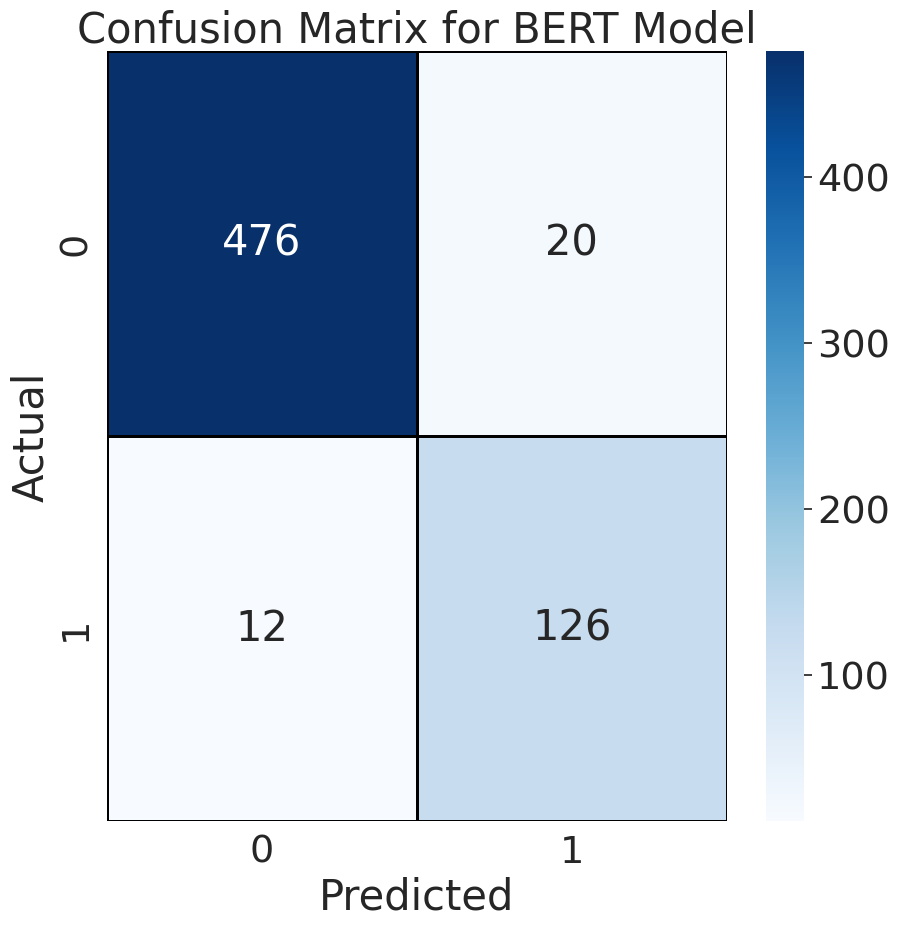

In [ ]:
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test,predictor_1)
plt.figure(figsize = (10,10))
sn.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
plt.title("Confusion Matrix for BERT Model")

sn.set(font_scale=2.5)

plt.ylabel("Actual")
sn.set(font_scale=2.5)